# Regularization methods
- **Norm Penalties** - $L_1, L_2$
    - $L_1$ tries to minimize the number of network parameters and reduces the model complexity. In other words, it is trying to have as many zero parameters as it is possible. $L_1$ **wants the smallest number of parameters. It is like ridge regression.**
    - $L_2$ tries to minimize the value of all the parameters and gives a more stable network. So, it does not care about the number of the non-zero parameters but it cares about their values. $L_2$ **wants the smallest values of parameters. It is like LASSO.**
- **Early stopping** - stops just a few epochs after validation loss is minimized
- **Data augmentation**
- **Dropout** - drops nodes randomly during training but is included weighed by probability p during prediction
    - A few questions: By specifying p = 0.5, does it randomly drop nodes for a particular layer or all through
    - How do you set drop for input layer?    <br>
    

- Section 10 - https://github.com/SBalas/2020-CS109A/blob/master/content/sections/section10/notebook/cs109a_section_10.ipynb
- Lec 32 - L1,L2 - https://harvard-iacs.github.io/2020-CS109A/lectures/lecture32/notebook/
- Lec 32 - Early stopping - https://harvard-iacs.github.io/2020-CS109A/lectures/lecture32/notebook-2/


<img src="./images/regularization_L1L2.png" style="width: 800px;" >

In [107]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import mean_squared_error
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks

from sklearn.model_selection import train_test_split
np.random.seed(0)
tf.random.set_seed(0)
%matplotlib inline

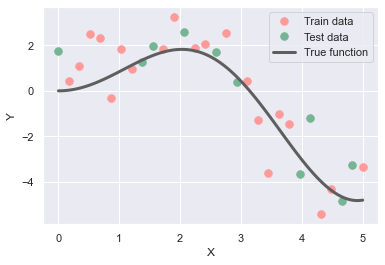

In [2]:
# Generate the data and split into train and test

# Defines the number of data points to generate
num_points = 30 

# Generate predictor points (x) between 0 and 5
x = np.linspace(0,5,num_points)

# Generate the response variable (y) using the predictor points
y = x * np.sin(x) + np.random.normal(loc=0, scale=1, size=num_points)

# Generate data of the true function y = x*sin(x) 
# x_b will be used for all predictions below 
x_b = np.linspace(0,5,100)
y_b = x_b*np.sin(x_b)

# Split the data into train and test sets with .33 and random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# PLot train, test, and true
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')
plt.plot(x_b, y_b, '-', label='True function', linewidth=3, color='#5E5E5E')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

### Unregularized NN

In [11]:
# The FCNN has 5 layers, each with 100 nodes
model_1 = models.Sequential(name='Unregularized')

# Add 5 hidden layers with 100 neurons each
model_1.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))

# Add the output layer with one neuron 
model_1.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_1.summary()

Model: "Unregularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
_________________________________________________

In [58]:
# compile model
model_1.compile(loss = 'mean_squared_error', 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = 'accuracy')

# fit on training set
history_1 = model_1.fit(x_train,  y_train, epochs = 1500, batch_size = 10, validation_split = 0.2, verbose = 0)



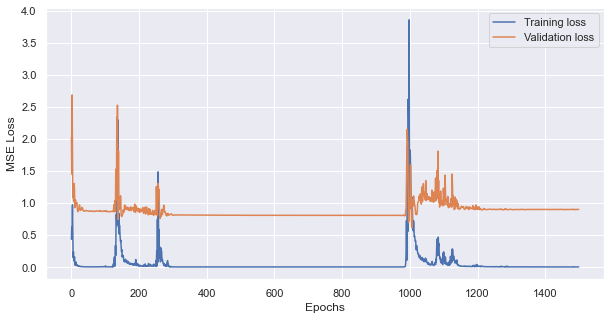

In [59]:
plt.figure(figsize = (10,5))

plt.plot(history_1.history['loss'], label = 'Training loss')
plt.plot(history_1.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend();


In [76]:
# Use the model above to predict for x_b (used exclusively for plotting)
y_pred = model_1.predict(x_b)

# Use the model above to predict for x_text  
y_pred_test = model_1.predict(x_test)

# Compute the test MSE
mse_test = mean_squared_error(y_test, y_pred_test)


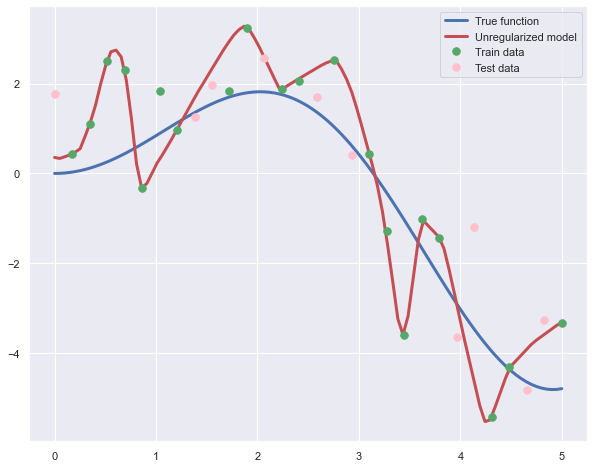

In [77]:
plt.plot(x_b, y_b, '-', label='True function', linewidth=3)
plt.plot(x_b, y_pred, label = 'Unregularized model', linewidth=3, color = 'r')
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='g')
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='pink')
plt.legend()
plt.show()

# looks like there is overfitting

## Regularize with L2 method - wants smallest values for weights
https://keras.io/api/layers/regularizers/

In [83]:
# The FCNN has 5 layers, each with 100 nodes
model_L2 = models.Sequential(name='Regularized_L2')

# Add 5 hidden layers with 100 neurons each
model_L2.add(layers.Dense(100,  activation='tanh', input_shape=(1,),
                         kernel_regularizer = regularizers.l2(0.1)))
model_L2.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l2(0.1)))
model_L2.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l2(0.1)))
model_L2.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l2(0.1)))
model_L2.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l2(0.1)))

# Add the output layer with one neuron 
model_L2.add(layers.Dense(1,  activation='linear'))


In [84]:
# compile model
model_L2.compile(loss = 'mean_squared_error', 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = 'accuracy')

# fit on training set
history_L2 = model_L2.fit(x_train,  y_train, epochs = 1500, batch_size = 10, validation_split = 0.2, verbose = 0)

In [86]:
# Use the model above to predict for x_b (used exclusively for plotting)
y_pred_L2 = model_L2.predict(x_b)

# Use the model above to predict for x_text  
y_pred_test_L2 = model_L2.predict(x_test)

# Compute the test MSE
mse_test_L2 = mean_squared_error(y_test, y_pred_test_L2)

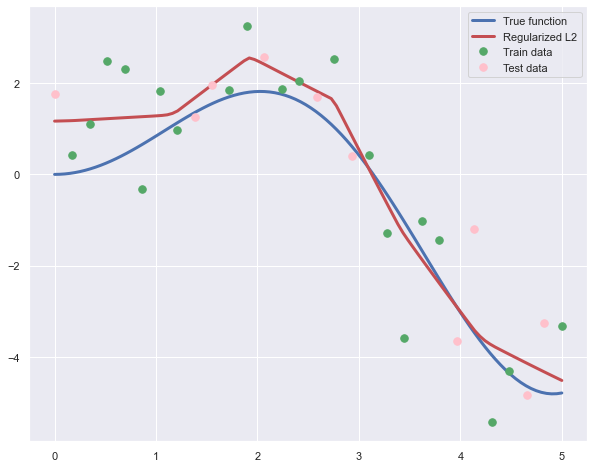

In [88]:
plt.plot(x_b, y_b, '-', label='True function', linewidth=3)
plt.plot(x_b, y_pred_L2, label = 'Regularized L2', linewidth=3, color = 'r')
plt.plot(x_train, y_train, '.', label='Train data', markersize=15, color='g')
plt.plot(x_test, y_test, '.', label='Test data', markersize=15, color='pink')
plt.legend()
plt.show()

## Regularize with L1 method - wants fewer number of weights

In [96]:
# The FCNN has 5 layers, each with 100 nodes
model_L1 = models.Sequential(name='Regularized_L1')

# Add 5 hidden layers with 100 neurons each
model_L1.add(layers.Dense(100,  activation='tanh', input_shape=(1,),
                         kernel_regularizer = regularizers.l1(0.01)))
model_L1.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l1(0.01)))
model_L1.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l1(0.01)))
model_L1.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l1(0.01)))
model_L1.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l1(0.01)))

# Add the output layer with one neuron 
model_L1.add(layers.Dense(1,  activation='linear'))

In [97]:
# compile model
model_L1.compile(loss = 'mean_squared_error', 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = 'accuracy')

# fit on training set
history_L1 = model_L1.fit(x_train,  y_train, epochs = 1500, batch_size = 10, validation_split = 0.2, verbose = 0)

In [98]:
# Use the model above to predict for x_b (used exclusively for plotting)
y_pred_L1 = model_L1.predict(x_b)

# Use the model above to predict for x_text  
y_pred_test_L1 = model_L1.predict(x_test)

# Compute the test MSE
mse_test_L1 = mean_squared_error(y_test, y_pred_test_L1)

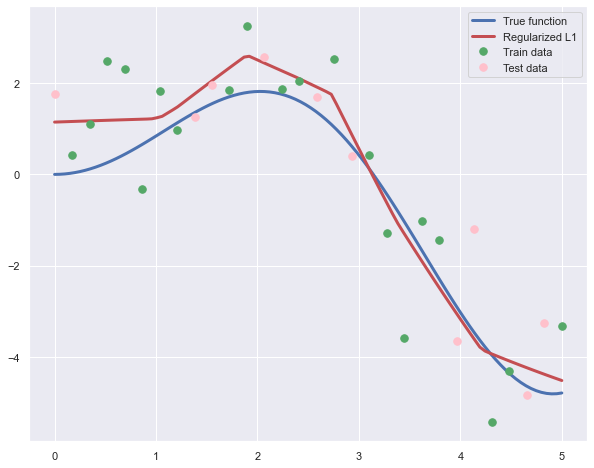

In [99]:
plt.plot(x_b, y_b, '-', label='True function', linewidth=3)
plt.plot(x_b, y_pred_L1, label = 'Regularized L1', linewidth=3, color = 'r')

plt.plot(x_train, y_train, '.', label='Train data', markersize=15, color='g')
plt.plot(x_test, y_test, '.', label='Test data', markersize=15, color='pink')
plt.legend()
plt.show()

In [104]:
print("MSE unregularized :", mse_test)
print("MSE Regularized L1:", mse_test_L1)
print("MSE Regularized L2:", mse_test_L2)


MSE unregularized : 1.8066675100911755
MSE Regularized L1: 0.8717487741401844
MSE Regularized L2: 0.7845001203554001


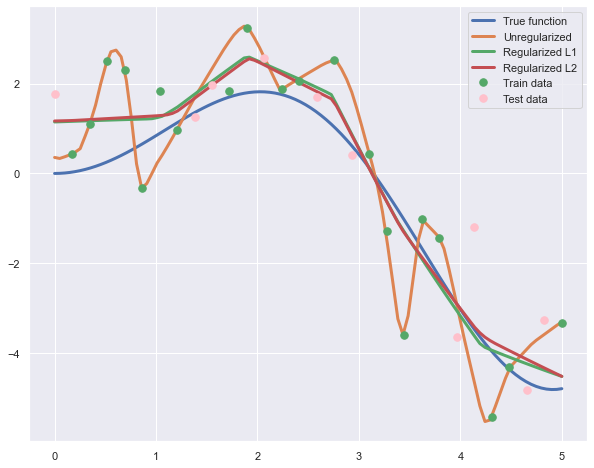

In [106]:
plt.plot(x_b, y_b, '-', label='True function', linewidth=3)
plt.plot(x_b, y_pred, label = 'Unregularized', linewidth=3)
plt.plot(x_b, y_pred_L1, label = 'Regularized L1', linewidth=3)
plt.plot(x_b, y_pred_L2, label = 'Regularized L2', linewidth=3)

plt.plot(x_train, y_train, '.', label='Train data', markersize=15, color='g')
plt.plot(x_test, y_test, '.', label='Test data', markersize=15, color='pink')
plt.legend();


## Early stopping
The easiest way to avoid overfitting is the early-stopping method, namely stop the training when the validation loss is minimum.

<img src="./images/regularization_earlystop.png" style="width: 800px;" >

In [108]:
# Set where the model should stop after loss_validation has reached a minimum
callback = callbacks.EarlyStopping(monitor='val_loss', patience=55)

# The FCNN has 5 layers, each with 100 nodes
model_ES = models.Sequential(name='Early_stoppong')

# Add 5 hidden layers with 100 neurons each
model_ES.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))
model_ES.add(layers.Dense(100,  activation='relu'))
model_ES.add(layers.Dense(100,  activation='relu'))
model_ES.add(layers.Dense(100,  activation='relu'))
model_ES.add(layers.Dense(100,  activation='relu'))

# Add the output layer with one neuron 
model_ES.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_ES.summary()

Model: "Early_stoppong"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_51 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_52 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_53 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_54 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
________________________________________________

In [110]:
# compile model
model_ES.compile(loss = 'mean_squared_error', 
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))                

# fit on training set
history_ES = model_ES.fit(x_train,  y_train, 
                         epochs = 1500, batch_size = 10, 
                         validation_split = 0.2, verbose = 0,
                         callbacks = [callback])

In [113]:
# Use the model above to predict for x_b (used exclusively for plotting)
y_pred_ES = model_ES.predict(x_b)

# Use the model above to predict for x_text  
y_pred_test_ES = model_ES.predict(x_test)

# Compute the test MSE
mse_test_ES = mean_squared_error(y_test, y_pred_test_ES)


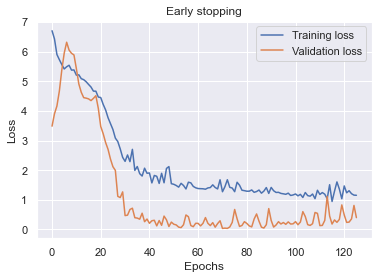

In [124]:
plt.plot(history_ES.history['loss'], label = 'Training loss')
plt.plot(history_ES.history['val_loss'], label = 'Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Early stopping")
plt.legend();

## Dropout method

<img src="./images/regularization_dropping.png" style="width: 1000px;" >

In [158]:
# The FCNN has 5 layers, each with 100 nodes
model_D = models.Sequential(name='Dropping_L2')

# Add 5 hidden layers with 100 neurons each
model_D.add(layers.Dense(100,  activation='tanh', input_shape=(1,), kernel_regularizer = regularizers.l2(0.1)))

# dropout for first hidden layer
model_D.add(layers.Dropout(0.5))

model_D.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l2(0.1)))
model_D.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l2(0.1)))
model_D.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l2(0.1)))
model_D.add(layers.Dense(100,  activation='relu', kernel_regularizer = regularizers.l2(0.1)))

# Add the output layer with one neuron 
model_D.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_D.summary()

Model: "Dropping_L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 100)               200       
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_128 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_129 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_130 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_131 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 

In [159]:
# compile model
model_D.compile(loss = 'mean_squared_error', 
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))                

# fit on training set
history_D = model_D.fit(x_train,  y_train, epochs = 1500, batch_size = 10, validation_split = 0.2, verbose = 0)
                         

In [160]:
# Use the model above to predict for x_b (used exclusively for plotting)
y_pred_D = model_D.predict(x_b)

# Use the model above to predict for x_text  
y_pred_test_D = model_D.predict(x_test)

# Compute the test MSE
mse_test_D = mean_squared_error(y_test, y_pred_test_D)

In [168]:
print("MSE unregularized :", round(mse_test,2))
print("MSE Regularized L1:", round(mse_test_L1,2))
print("MSE Regularized L2:", round(mse_test_L2,2))
print("MSE Regularized ES:", round(mse_test_ES,2))
print("MSE Regularized L2 + dropping:", round(mse_test_D,2))

MSE unregularized : 1.81
MSE Regularized L1: 0.87
MSE Regularized L2: 0.78
MSE Regularized ES: 1.18
MSE Regularized L2 + dropping: 0.75
